In [1]:
import lib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Xc_val, yc_val, Xc_test, yc_test = lib.load_dataset("../dataset_clusterified")

In [4]:
import cv2

class ClusterifiedEstimator(lib.Estimator):
    def __init__(self, weighted, reduction):
        self.weighted = weighted
        self.reduction = reduction

    def predict_one(self, img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        lines = lib.detect_lines(gray.astype(np.uint8))
        
        return lib.angle_from_lines(lines, self.weighted, reduction=self.reduction)

In [5]:
def maxabs(x):
    mi = np.min(x)
    ma = np.max(x)
    
    if abs(ma) > abs(mi):
        return ma
    
    return mi

In [16]:
for weighted in [False, True]:
    for reduction in [
        np.sum,
        maxabs,
    ]:
        score = ClusterifiedEstimator(weighted, reduction).score(Xc_val, yc_val)
        print(f"score: {score} weighted: {weighted}, reduction: {reduction}")

score: (0.3168898526400779, 0.38182914533109247) weighted: False, reduction: <function sum at 0x7fdac8fb50e0>
score: (0.4189458215978799, 0.5482930275487115) weighted: False, reduction: <function maxabs at 0x7fdaa2db23b0>
score: (0.31699097829917716, 0.3859765102045846) weighted: True, reduction: <function sum at 0x7fdac8fb50e0>
score: (0.3628844092382343, 0.5142721901191757) weighted: True, reduction: <function maxabs at 0x7fdaa2db23b0>


(array([992., 328., 299., 171., 715., 580., 261., 124., 175., 961.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

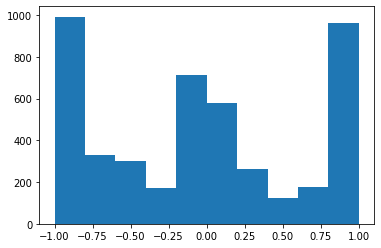

In [7]:
plt.hist(yc_val)

In [12]:
def plot_distrib(weighted, reduction):
    estimator = ClusterifiedEstimator(weighted, reduction)
    plt.hist([estimator.predict_one(x) for x in Xc_val])
    plt.title(f"weighted: {weighted}, reduction: {reduction}")

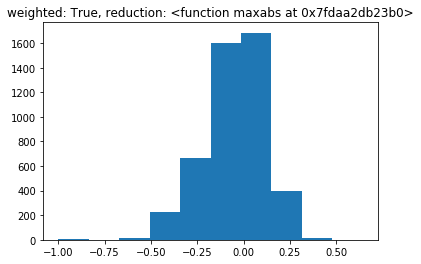

In [13]:
plot_distrib(True, maxabs)

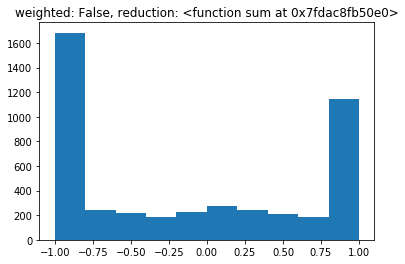

In [17]:
plot_distrib(False, np.sum)

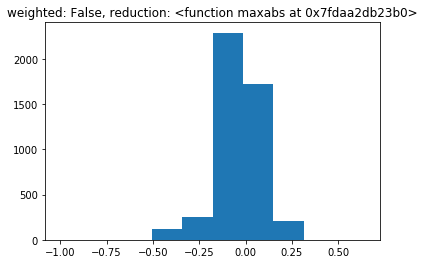

In [15]:
plot_distrib(False, maxabs)